
# Modulo 2 Unidad 1 Grupo 6

## Thyroid Disease Data Set

### Etapa 1: Entendimiento de los datos
Debido a que hay muchos datos faltantes la primera parte del entendimiento de datos se dedicara a arreglar esto.

##Integrantes: 
Francisco Suarez


In [1]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allbp.data"
data = pd.read_csv(url, header=None, sep=",", error_bad_lines=False, warn_bad_lines=True, na_values="?")
data.iloc[:, 29] = data.iloc[:, 29].str.split('.').str[0]

# filter out any rows that have more than 13 attributes
#data = data[data.apply(lambda x: len(x) == 13, axis=1)]
data.columns = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source', 'binaryClass']

# La columna llamada binaryClass es el atributo a predecir

dataOrginal = data
data.head()

<ipython-input-1-9c7e2b49481a>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(url, header=None, sep=",", error_bad_lines=False, warn_bad_lines=True, na_values="?")
<ipython-input-1-9c7e2b49481a>:10: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(url, header=None, sep=",", error_bad_lines=False, warn_bad_lines=True, na_values="?")


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


Attribute Information:

first three columns are B,G,R (x1,x2, and x3 features) values and fourth column is of the class labels (decision variable y)

In [2]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = data.shape
shape

(2800, 30)

In [3]:
data.isnull().sum()

age                             1
sex                           110
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           284
T3_measured                     0
T3                            585
TT4_measured                    0
TT4                           184
T4U_measured                    0
T4U                           297
FTI_measured                    0
FTI                           295
TBG_measured                    0
TBG                          2800
referral_source                 0
binaryClass   

In [4]:
data = data.drop('TBG',axis=1)
data = data.drop('referral_source',axis=1)
shape = data.shape
shape

(2800, 28)

In [5]:
data["binaryClass"].value_counts()

negative                     2667
increased binding protein     124
decreased binding protein       9
Name: binaryClass, dtype: int64

In [6]:
data["binaryClass"]=data["binaryClass"].map({"negative":0,"increased binding protein":1,"decreased binding protein":2})#se trasforma la columna objetivo a valores numericos para entenderla mejor y prepararla para el procesamiento

In [7]:
data=data.replace({"t":1,"f":0})#se reemplazan los valores booleanos por numericos
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,binaryClass
0,41.0,F,0,0,0,0,0,0,0,0,...,1,2.5,1,125.0,1,1.14,1,109.0,0,0
1,23.0,F,0,0,0,0,0,0,0,0,...,1,2.0,1,102.0,0,NaN,0,NaN,0,0
2,46.0,M,0,0,0,0,0,0,0,0,...,0,NaN,1,109.0,1,0.91,1,120.0,0,0
3,70.0,F,1,0,0,0,0,0,0,0,...,1,1.9,1,175.0,0,NaN,0,NaN,0,0
4,70.0,F,0,0,0,0,0,0,0,0,...,1,1.2,1,61.0,1,0.87,1,70.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70.0,M,0,0,0,0,0,0,0,0,...,0,NaN,1,155.0,1,1.05,1,148.0,0,0
2796,73.0,M,0,1,0,0,0,0,0,0,...,1,0.7,1,63.0,1,0.88,1,72.0,0,0
2797,75.0,M,0,0,0,0,0,0,0,0,...,0,NaN,1,147.0,1,0.80,1,183.0,0,0
2798,60.0,F,0,0,0,0,0,0,0,0,...,0,NaN,1,100.0,1,0.83,1,121.0,0,0


In [8]:
data=data.replace({"?":np.NAN})

In [9]:
data.isnull().sum()

age                            1
sex                          110
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                          284
T3_measured                    0
T3                           585
TT4_measured                   0
TT4                          184
T4U_measured                   0
T4U                          297
FTI_measured                   0
FTI                          295
TBG_measured                   0
binaryClass                    0
dtype: int64

In [10]:
data=data.replace({"F":1,"M":0})#mas transformaciones a datos numericos

In [11]:
#Cual es el tipo de los atributos?
data.dtypes

age                          float64
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
I131_treatment                 int64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
b

In [12]:
cols = data.columns[data.dtypes.eq('object')]
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
data.dtypes

age                          float64
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
I131_treatment                 int64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
b

Se reemplazan los valores nulos por el mean de su respectiva columna

In [13]:
data['T4U_measured'].fillna(data['T4U_measured'].mean(), inplace=True)
data['sex'].fillna(data['sex'].mean(), inplace=True)
data['age'].fillna(data['age'].mean(), inplace=True)

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data['TSH'] = imputer.fit_transform(data[['TSH']])
data['T3'] = imputer.fit_transform(data[['T3']])
data['TT4'] = imputer.fit_transform(data[['TT4']])
data['T4U'] = imputer.fit_transform(data[['T4U']])
data['FTI'] = imputer.fit_transform(data[['FTI']])
data.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
binaryClass                  0
dtype: int64

In [15]:
#Medida de centralidad y desviación para atributos numéricos:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,binaryClass
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,...,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.0,2800.000000
mean,51.844230,0.680297,0.117857,0.014286,0.012143,0.039286,0.014643,0.013929,0.017143,0.058214,...,0.791071,2.024966,0.934286,109.072401,0.893929,0.997912,0.894643,110.787984,0.0,0.050714
std,20.457505,0.457190,0.322496,0.118687,0.109543,0.194309,0.120140,0.117215,0.129827,0.234190,...,0.406616,0.733383,0.247826,34.209359,0.307984,0.183788,0.307068,31.102848,0.0,0.233646
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.050000,0.000000,2.000000,0.000000,0.310000,0.000000,2.000000,0.0,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.700000,1.000000,89.000000,1.000000,0.890000,1.000000,95.000000,0.0,0.000000
50%,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.024966,1.000000,107.000000,1.000000,0.997912,1.000000,110.000000,0.0,0.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.300000,1.000000,123.000000,1.000000,1.070000,1.000000,122.000000,0.0,0.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,10.600000,1.000000,430.000000,1.000000,2.120000,1.000000,395.000000,0.0,2.000000


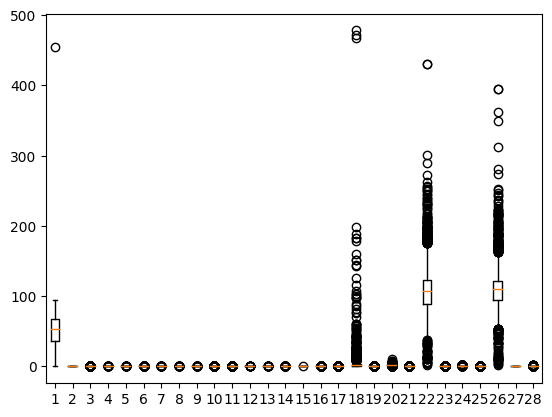

In [16]:
# Diagrama de cajas y bigotes para atributos numéricos
plt.boxplot((data['age'],data['sex'],data['on_thyroxine'],data['query_on_thyroxine'],data['on_antithyroid_medication'],data['sick'],data['pregnant'],data['thyroid_surgery'],data['I131_treatment'],data['query_hypothyroid'],data['query_hyperthyroid'],data['lithium'],data['goitre'],data['tumor'],data['hypopituitary'],data['psych'],data['TSH_measured'],data['TSH'],data['T3_measured'],data['T3'],data['TT4_measured'],data['TT4'],data['T4U_measured'],data['T4U'],data['FTI_measured'],data['FTI'],data['TBG_measured'],data['binaryClass']))
plt.show()

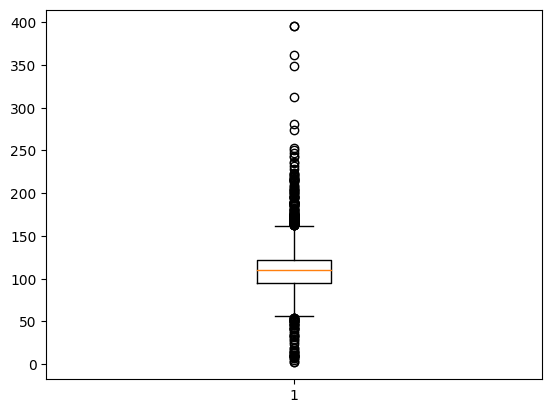

In [17]:
plt.boxplot((data['FTI']))
plt.show()

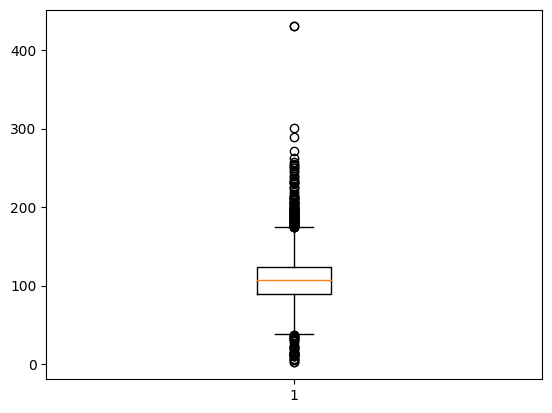

In [18]:
plt.boxplot((data['TT4']))
plt.show()

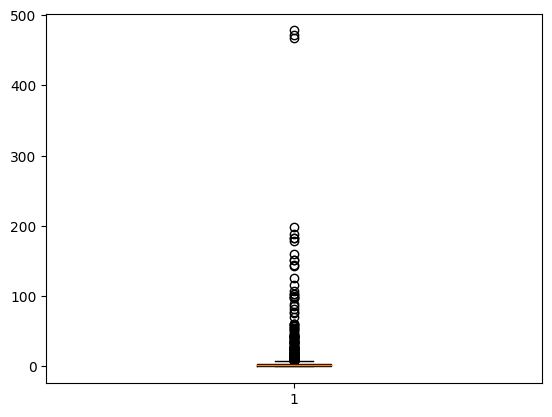

In [19]:
plt.boxplot((data['TSH']))
plt.show()

In [20]:
#Medida de centralidad para atributos categóricos:
data.mode()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,binaryClass
0,59.0,1.0,0,0,0,0,0,0,0,0,...,1,2.024966,1,109.072401,1,0.997912,1,110.787984,0,0


<Axes: >

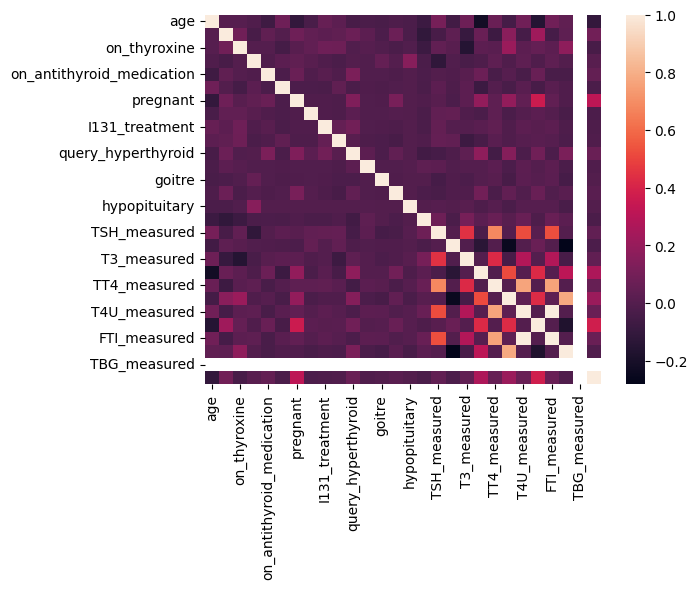

In [21]:
# Correlación entre los atributos de entrada numéricos
# Permite detectar si hay atributos redundantes (correlación mayor a 0.85 o menor a -0.85)

sns.heatmap(data.corr(), annot=False)

In [22]:
#data = data.drop('',axis=1)
data.corr()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,binaryClass
age,1.000000,0.007868,0.004562,-0.015858,-0.069303,0.081531,-0.109112,-0.032320,0.054388,0.023967,...,7.378219e-02,-2.206854e-01,6.443236e-02,-5.043018e-02,8.611893e-02,-1.548795e-01,8.502862e-02,3.566878e-02,NaN,-0.108821
sex,0.007868,1.000000,0.087097,-0.040900,0.034740,-0.001899,0.083180,0.043123,0.026404,0.033877,...,-9.461275e-02,6.281101e-02,-7.248862e-02,1.606953e-01,-4.444519e-02,2.253759e-01,-4.549545e-02,3.050824e-02,NaN,0.091908
on_thyroxine,0.004562,0.087097,1.000000,0.002667,-0.000072,-0.051109,0.010769,0.041619,0.079724,0.074691,...,-1.554428e-01,2.387746e-02,1.647580e-02,2.103782e-01,2.519205e-02,5.081718e-02,2.441681e-02,1.783770e-01,NaN,-0.041420
query_on_thyroxine,-0.015858,-0.040900,0.002667,1.000000,-0.013347,0.022131,0.035436,0.011373,-0.015899,-0.029931,...,-3.437115e-02,-2.000577e-02,3.192754e-02,-1.362976e-02,3.169514e-02,-1.406218e-02,3.150962e-02,-5.296991e-03,NaN,0.012515
on_antithyroid_medication,-0.069303,0.034740,-0.000072,-0.013347,1.000000,-0.022420,0.067926,-0.013177,0.010479,-0.013638,...,8.851730e-03,7.338208e-02,-3.639754e-02,3.708694e-03,-3.593692e-02,6.151346e-02,-3.630208e-02,-3.589118e-02,NaN,0.045726
sick,0.081531,-0.001899,-0.051109,0.022131,-0.022420,1.000000,-0.024651,-0.024034,-0.026706,0.036088,...,2.705064e-02,-8.028245e-02,1.695820e-03,-3.399314e-02,1.592720e-02,-4.080888e-02,1.550425e-02,-1.599598e-02,NaN,-0.028162
pregnant,-0.109112,0.083180,0.010769,0.035436,0.067926,-0.024651,1.000000,-0.014488,-0.016100,-0.017610,...,2.608047e-02,1.857188e-01,3.233003e-02,1.922028e-01,4.199174e-02,3.607546e-01,4.183341e-02,-1.198081e-02,NaN,0.317185
thyroid_surgery,-0.032320,0.043123,0.041619,0.011373,-0.013177,-0.024034,-0.014488,1.000000,-0.015696,-0.016534,...,-1.388093e-02,-2.669856e-02,3.152021e-02,-3.107943e-02,1.353707e-03,2.011792e-02,1.081233e-03,-3.631560e-02,NaN,-0.025802
I131_treatment,0.054388,0.026404,0.079724,-0.015899,0.010479,-0.026706,-0.016100,-0.015696,1.000000,0.049420,...,1.933661e-04,1.445133e-02,3.502567e-02,-1.202422e-02,2.762255e-02,8.625227e-03,2.739770e-02,-1.886757e-02,NaN,-0.016893
query_hypothyroid,0.023967,0.033877,0.074691,-0.029931,-0.013638,0.036088,-0.017610,-0.016534,0.049420,1.000000,...,-7.482912e-02,-4.060754e-02,1.669089e-02,-1.343292e-02,6.388074e-03,1.367049e-02,5.828699e-03,-2.270144e-02,NaN,-0.014798


In [23]:
# Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.
max(data.isnull().sum(axis=1))

0

In [24]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()
#data.loc[data['Bare_Nuclei'] == '?']

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
binaryClass                  0
dtype: int64

In [25]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['binaryClass'].value_counts())

0    2667
1     124
2       9
Name: binaryClass, dtype: int64


In [26]:
# Count the number of values outside the standard deviation for each column
outliers = {}
mean = data.mean()
std = data.std()
for column in data.columns:
    outliers[column] = ((data[column] > mean[column] + std[column]) | (data[column] < mean[column] - std[column])).sum()
outliers


{'age': 924,
 'sex': 860,
 'on_thyroxine': 330,
 'query_on_thyroxine': 40,
 'on_antithyroid_medication': 34,
 'sick': 110,
 'pregnant': 41,
 'thyroid_surgery': 39,
 'I131_treatment': 48,
 'query_hypothyroid': 163,
 'query_hyperthyroid': 173,
 'lithium': 14,
 'goitre': 25,
 'tumor': 71,
 'hypopituitary': 1,
 'psych': 135,
 'TSH_measured': 284,
 'TSH': 75,
 'T3_measured': 585,
 'T3': 541,
 'TT4_measured': 184,
 'TT4': 610,
 'T4U_measured': 297,
 'T4U': 610,
 'FTI_measured': 295,
 'FTI': 565,
 'TBG_measured': 0,
 'binaryClass': 133}

In [27]:
#se reemplazan todos lso datos atipicos con la media de tu columna
for column in data.columns:
    print(column)
    if column != "binaryClass":
      outlier_mask = np.abs(data[column] - mean[column]) > std[column]
      data.loc[outlier_mask, column] = mean[column]

dataNoOutliers = data

outliers = {}
for column in data.columns:
    outliers[column] = ((data[column] > mean[column] + std[column]) | (data[column] < mean[column] - std[column])).sum()
outliers

age
sex
on_thyroxine
query_on_thyroxine
on_antithyroid_medication
sick
pregnant
thyroid_surgery
I131_treatment
query_hypothyroid
query_hyperthyroid
lithium
goitre
tumor
hypopituitary
psych
TSH_measured
TSH
T3_measured
T3
TT4_measured
TT4
T4U_measured
T4U
FTI_measured
FTI
TBG_measured
binaryClass


{'age': 0,
 'sex': 0,
 'on_thyroxine': 0,
 'query_on_thyroxine': 0,
 'on_antithyroid_medication': 0,
 'sick': 0,
 'pregnant': 0,
 'thyroid_surgery': 0,
 'I131_treatment': 0,
 'query_hypothyroid': 0,
 'query_hyperthyroid': 0,
 'lithium': 0,
 'goitre': 0,
 'tumor': 0,
 'hypopituitary': 0,
 'psych': 0,
 'TSH_measured': 0,
 'TSH': 0,
 'T3_measured': 0,
 'T3': 0,
 'TT4_measured': 0,
 'TT4': 0,
 'T4U_measured': 0,
 'T4U': 0,
 'FTI_measured': 0,
 'FTI': 0,
 'TBG_measured': 0,
 'binaryClass': 133}

<Axes: >

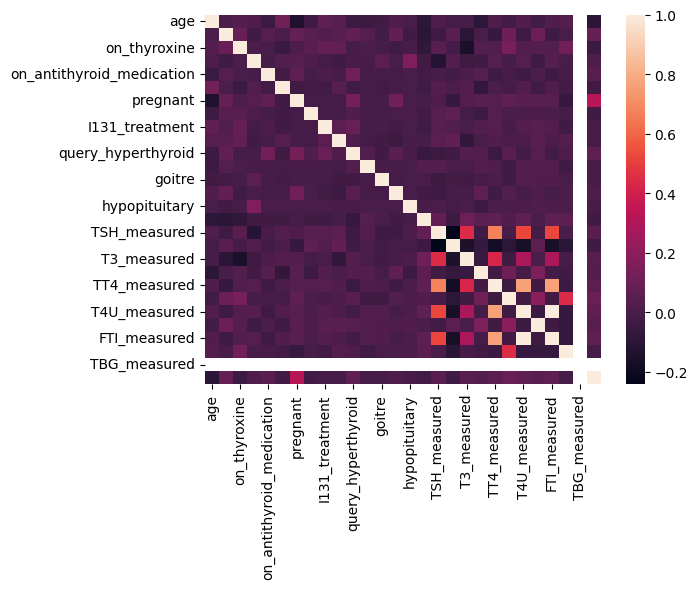

In [28]:
sns.heatmap(data.corr(), annot=False)


In [29]:
#data['alive_at_1'] = data['alive_at_1'].astype('int64')
#data['stil_alive'] = data['alive_at_1'].astype('int64')
data.dtypes

age                          float64
sex                          float64
on_thyroxine                 float64
query_on_thyroxine           float64
on_antithyroid_medication    float64
sick                         float64
pregnant                     float64
thyroid_surgery              float64
I131_treatment               float64
query_hypothyroid            float64
query_hyperthyroid           float64
lithium                      float64
goitre                       float64
tumor                        float64
hypopituitary                float64
psych                        float64
TSH_measured                 float64
TSH                          float64
T3_measured                  float64
T3                           float64
TT4_measured                 float64
TT4                          float64
T4U_measured                 float64
T4U                          float64
FTI_measured                 float64
FTI                          float64
TBG_measured                   int64
b

In [30]:
data = data[data['binaryClass'] != 2]
#Se eliminan las 9 filas que tienen un valor diferente en la columna objetivo, 
#esto se debe a que degrada considerablemente el resdimiento de los modelos y es dificil mejorarlo sin llegar al overfitting ya que son pocos datos

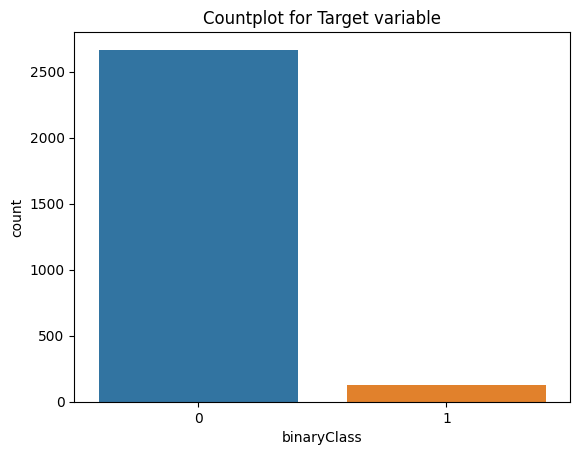

In [31]:
sns.countplot(x='binaryClass',data=data)
plt.title("Countplot for Target variable");

In [32]:
positive_data = data[data.binaryClass==1]
positive_data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,binaryClass
27,51.84423,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,1.000000,2.024966,1.0,129.000000,0.893929,0.997912,0.894643,110.787984,0,1
55,51.84423,0.680297,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,1.000000,2.024966,1.0,109.072401,1.000000,0.997912,1.000000,111.000000,0,1
86,51.84423,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.791071,2.024966,1.0,109.072401,1.000000,0.997912,1.000000,121.000000,0,1
95,51.84423,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.791071,2.024966,1.0,137.000000,1.000000,0.997912,1.000000,84.000000,0,1
120,51.84423,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,1.000000,2.024966,1.0,91.000000,1.000000,1.100000,1.000000,83.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2737,51.84423,1.000000,0.0,0.0,0.000000,0.0,0.014643,0.0,0.0,0.0,...,1.000000,2.024966,1.0,109.072401,1.000000,0.997912,1.000000,112.000000,0,1
2747,51.84423,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,1.000000,2.024966,1.0,128.000000,1.000000,1.110000,1.000000,116.000000,0,1
2756,51.84423,1.000000,0.0,0.0,0.012143,0.0,0.000000,0.0,0.0,0.0,...,1.000000,2.024966,1.0,103.000000,1.000000,0.997912,1.000000,110.787984,0,1
2759,72.00000,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,1.000000,1.300000,1.0,83.000000,1.000000,0.997912,1.000000,110.787984,0,1


## Etapa 3: Modelado
Se crean 3 modelos, Logistic Regression y Support Vector Machine

In [33]:
X = data.drop('binaryClass',axis=1)
y = data.binaryClass

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [35]:
#SMOTE nos permite balancear la variable objetivo, debido a que hay una desigualdad muy grande entre el numero de binaryClass de cada tipo, optamos por balancear generando, en vez de eliminando, esto nos permite mantener la informacion que tenemos
#en los casos negativos

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2023)

x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,f1_score


models = {
    LogisticRegression(max_iter=100):'Logistic Regression 100 iterations',
    LogisticRegression(max_iter=500):'Logistic Regression 500 iterations',
    LogisticRegression(max_iter=1000):'Logistic Regression 1000 iterations',
    SVC():"Support Vector Machine",
    
}
for m in models.keys():
    m.fit(x_smote,y_smote)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy Score for Logistic Regression 100 iterations is :  68.33631484794276 %
Accuracy Score for Logistic Regression 500 iterations is :  69.58855098389982 %
Accuracy Score for Logistic Regression 1000 iterations is :  70.12522361359571 %
Accuracy Score for Support Vector Machine is :  65.83184257602862 %


In [37]:
for model,name in models.items():
    y_pred = model.predict(X_test)
    print("======================================================")
    print(f"Metricas de  {name}")  
    print()
    print(classification_report(y_test,y_pred))
    print()
    

Metricas de  Logistic Regression 100 iterations

              precision    recall  f1-score   support

           0       0.99      0.68      0.81       539
           1       0.08      0.80      0.15        20

    accuracy                           0.68       559
   macro avg       0.54      0.74      0.48       559
weighted avg       0.96      0.68      0.78       559


Metricas de  Logistic Regression 500 iterations

              precision    recall  f1-score   support

           0       0.99      0.69      0.81       539
           1       0.09      0.80      0.16        20

    accuracy                           0.70       559
   macro avg       0.54      0.75      0.49       559
weighted avg       0.96      0.70      0.79       559


Metricas de  Logistic Regression 1000 iterations

              precision    recall  f1-score   support

           0       0.99      0.70      0.82       539
           1       0.09      0.80      0.16        20

    accuracy                    

#Conclusiones
Podemos observar que en general, Logistic Regression se desempeña mejor que SVM en todas las métricas, sin embargo la diferencia no es muy grande, sobre todo con el logistic regression que solo hizo 100 iteraciones.

Si bien esto nos muestra que con este dataset y con este pre procesamiento de datos logistic regression se desempeña mejor que SVM, tenemos que tener dos cosas en cuenta.

Lo primero es que el preprocesamiento de datos nunca es perfecto, al tener métricas tan parecidas es probable que ambos modelos están siendo limitados por el mismo caso, lo que quiere decir que si lográramos encontrar este hipotético caso que hace que baje el desempeño los modelos podrán encontrar obstáculos diferentes y puede que el "mejor modelo" cambie.

Lo segundo es tener en cuenta cual es la métrica más importante para el dataset, en este caso estamos tratando de predecir una condición médica, por lo que un falso negativo es sumamente peligroso, si hay un falso positivo esto no es tan grave, pero un falso negativo puede poner vidas en riesgo, por lo tanto tenemos que fijarnos en el Recall, en este caso es claro de logistic regression es mejor que SVM, pero es importante ver que logistic regression puede ganar ventaja con el número de iteraciones que tiene, llevándolo de un rendimiento comparable al de SVM a uno objetivamente mejor.

Para concluir, podemos observar que el modelo de logistic regression tiene métricas superiores y más importante, tiene un recall superior al SVM, pero es algo preocupante que la métrica más baja sea el recall, ya que este es el más importante para nuestro dataset. Sin embargo es dificil mejorar el racall ya que hay un desbalanceo muy significativo entre casso negativos y positivos, al haber pocos casos positivos es dificil identificarlos en comparacion a identificar los negativos.

